In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.collections import LineCollection
from tool import local_max, noise, circle, outliers, gaussian, make_histogram_projection, extract_data, get_k_equipartition, gaussian_analysis
import numpy.random as rand
from scipy.optimize import curve_fit
from scipy import integrate
import scipy.constants as cnst
from glob import glob

## Trap Strength Analysis (Qualitative)

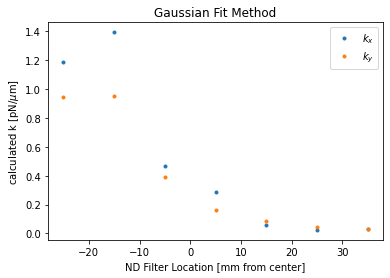

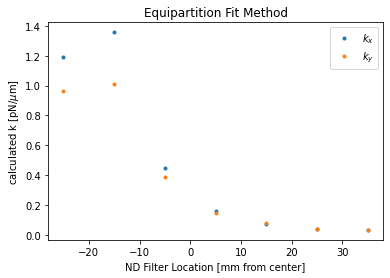

First datapoint may be outlier due to ND filter being at an agle or border
of filter glass blocking part of beam, we will look deeper int oit in the Power_dependance analysos.


In [2]:
directory = '/work/data/trap_strength/'
filenames = [directory + 'strength1.txt',directory + 'strength2.txt',directory + 'strength3.txt',
    directory + 'strength4.txt',directory + 'strength5.txt',directory + 'strength6.txt',
    directory + 'strength7.txt',]
k_arr_strength_gauss = []
k_arr_strength_eqi = []
ND_arr = np.arange(-25,45,10) # ND marker in mm

for filename in filenames:
    ret = extract_data(filename)
    
    
    analysis2 = gaussian_analysis(ret.x_dec, ret.y_dec)
    
    k_arr_strength_gauss.append([analysis2.k_x, analysis2.k_y])
    k_x, k_y = get_k_equipartition(ret.x_dec, ret.y_dec)
    k_arr_strength_eqi.append([k_x,k_y])
    
plt.show()
    

k_arr_strength_gauss = np.array(k_arr_strength_gauss)
k_arr_strength_eqi = np.array(k_arr_strength_eqi)

plt.plot(ND_arr,k_arr_strength_gauss[:,0],'.',label = r"$k_x$")
plt.plot(ND_arr,k_arr_strength_gauss[:,1],'.',label = r"$k_y$")
plt.xlabel("ND Filter Location [mm from center]")
plt.ylabel(r"calculated k [pN/$\mu$m]")
plt.title("Gaussian Fit Method")
plt.legend()
plt.show()

plt.plot(ND_arr,k_arr_strength_eqi[:,0],'.',label = r"$k_x$")
plt.plot(ND_arr,k_arr_strength_eqi[:,1],'.',label = r"$k_y$")
plt.xlabel("ND Filter Location [mm from center]")
plt.ylabel(r"calculated k [pN/$\mu$m]")
plt.title("Equipartition Fit Method")
plt.legend()
plt.show()

print("First datapoint may be outlier due to ND filter being at an agle or border\nof filter glass blocking part of beam, we will look deeper int oit in the Power_dependance analysos.")

# Trap Strength Quantitative?

['data/trap_strength/Power01.61.txt' 'data/trap_strength/Power02.62.txt'
 'data/trap_strength/Power04.24.txt' 'data/trap_strength/Power05.21.txt'
 'data/trap_strength/Power07.16.txt' 'data/trap_strength/Power08.89.txt'
 'data/trap_strength/Power11.54.txt' 'data/trap_strength/Power14.8.txt'
 'data/trap_strength/Power20.2.txt' 'data/trap_strength/Power28.5.txt'
 'data/trap_strength/Power42.5.txt' 'data/trap_strength/Power64.1.txt'
 'data/trap_strength/Power72.2.txt' 'data/trap_strength/Power72.5.txt'
 'data/trap_strength/Power77.7.txt']
for y:
mean = 0.00625161464037667
sigma = 0.11940994168584862
variance = 0.014258734173417768
k = 0.2885483360556829 [pN/um]
for x:
mean = 0.00036500047346422576
sigma = 0.21118263409396523
variance = 0.04459810494286561
k = 0.0922535615643501 [pN/um]
for y:
mean = -0.0019342571032339025
sigma = 0.11559622259232691
variance = 0.013362486677614789
k = 0.3079018239092015 [pN/um]
for x:
mean = 0.0025947181036109833
sigma = 0.16610828309874726
variance = 0.02

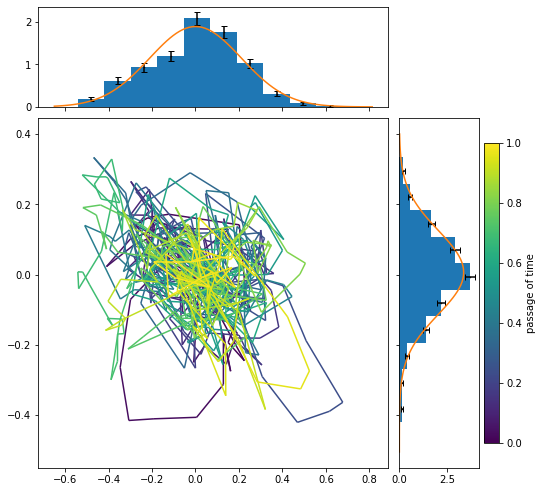

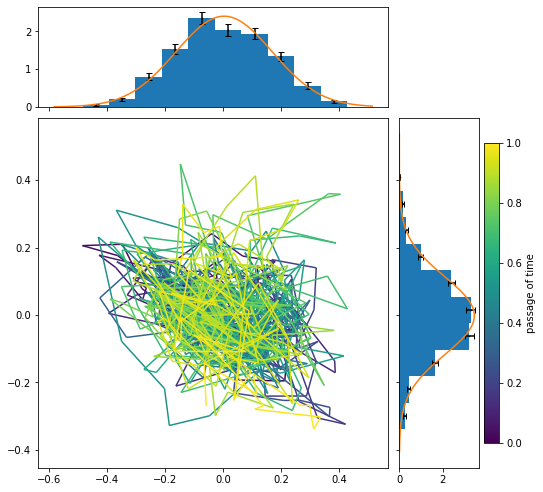

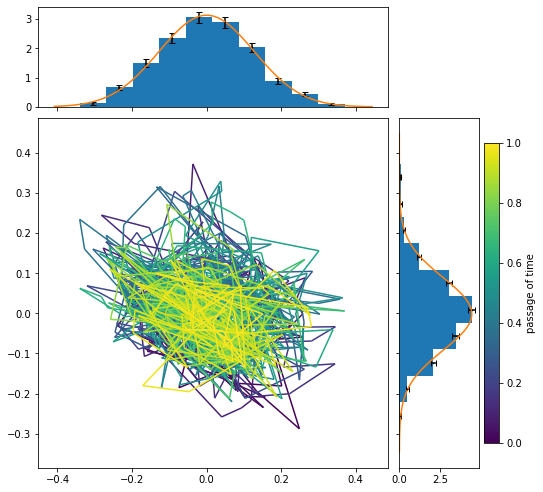

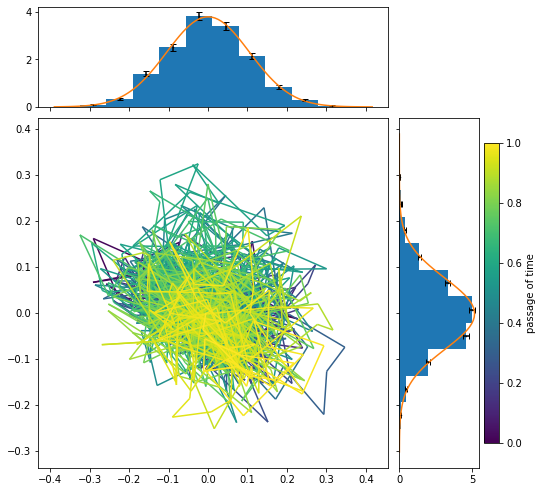

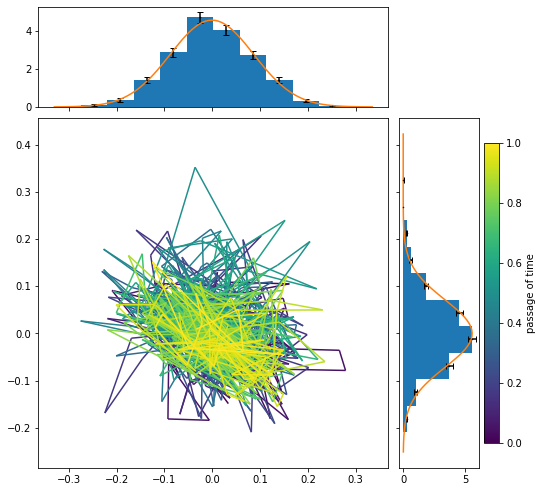

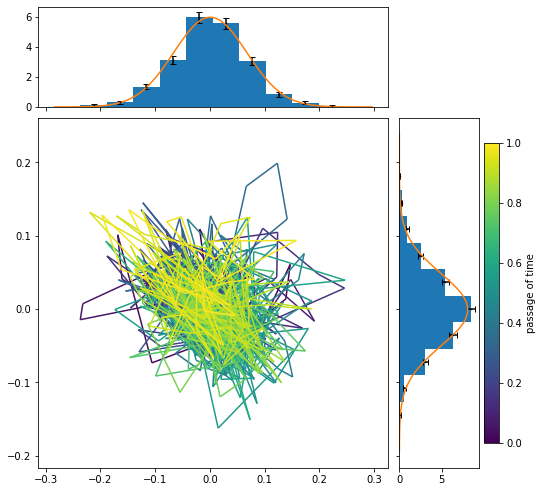

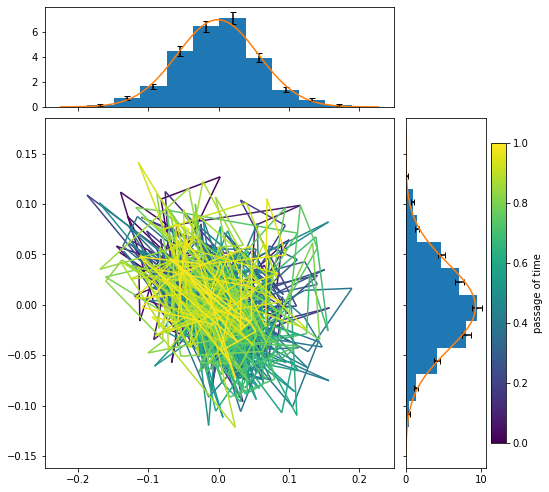

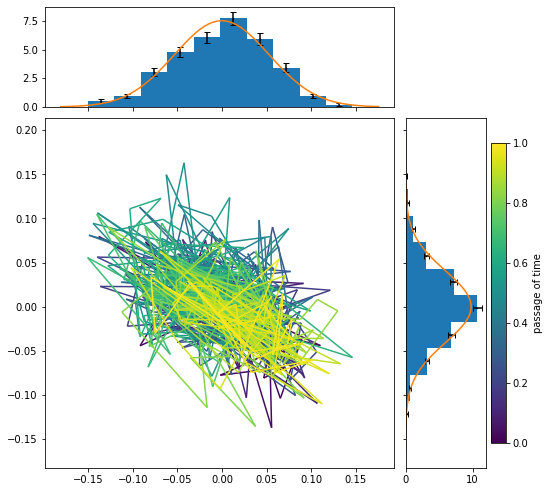

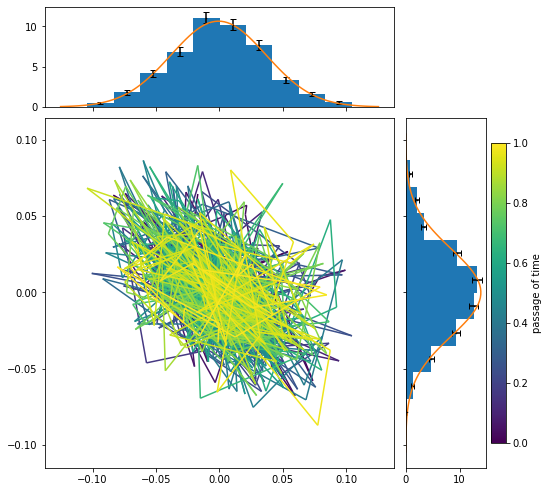

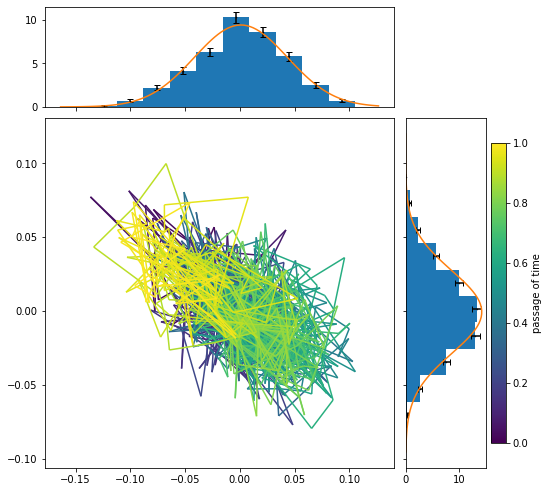

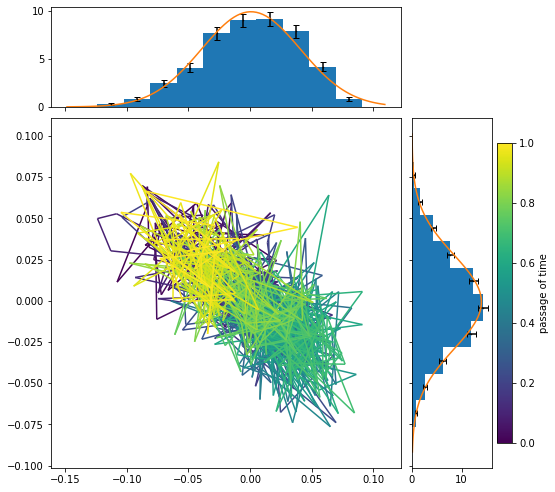

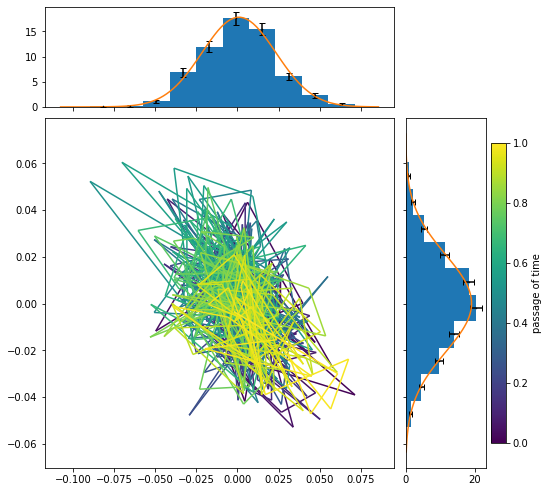

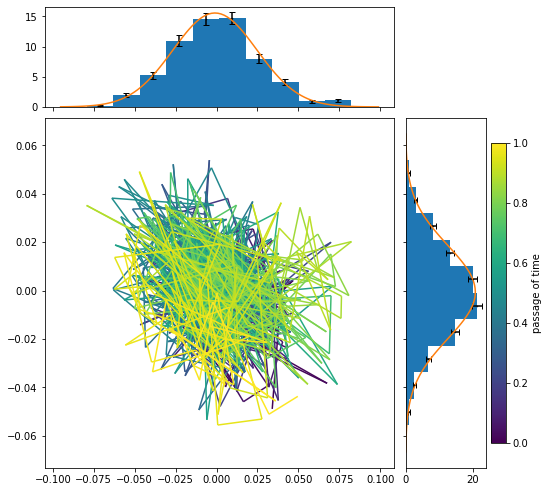

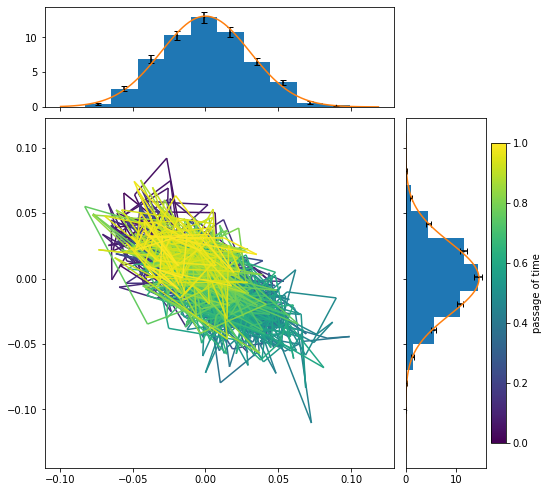

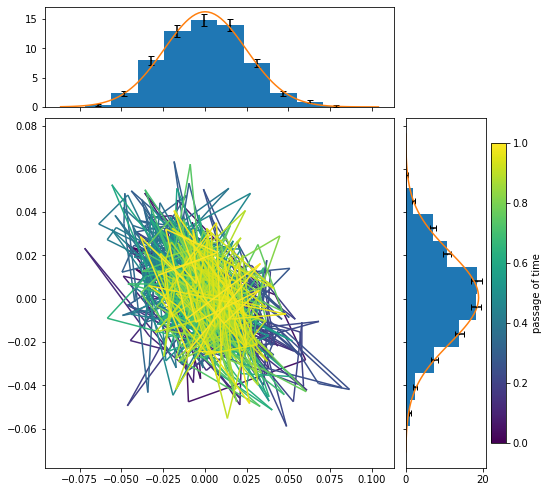

In [3]:
filenames = np.array(glob(('data/trap_strength/Power*')))
filenames = np.sort(filenames)
print(filenames)
# filenames = np.concatenate((filenames1, filenames2))
# print(filenames)

k_arr = []
k_arr_strength_eqi = []
powerArray = []

for filename in filenames:
    powerArray.append(float(filename.split("Power")[1][:-4]))
    ret = extract_data(filename)
    analysis2 = make_histogram_projection(ret.x_dec, ret.y_dec)
    # print(f"Via Gaussian Fit Method\nk_x = {analysis2.k_x}\nk_y = {analysis2.k_y}")
    k_arr.append([analysis2.k_x, analysis2.k_y])
    k_x, k_y = get_k_equipartition(ret.x_dec, ret.y_dec)
    k_arr_strength_eqi.append([k_x,k_y])

powerArray_err = np.array(powerArray)*0.003 # 3% relative error
old_powerArray = np.array(powerArray)

k_arr_strength_gauss = np.array(k_arr)[:-2]
k_arr_strength_equi = np.array(k_arr_strength_eqi)[:-2]
powerArray = np.array(powerArray)[:-2]/np.max(powerArray)

powerArray_err = np.sqrt((powerArray_err[:-2]/old_powerArray[:-2])**2 + (0.003)**2)*powerArray

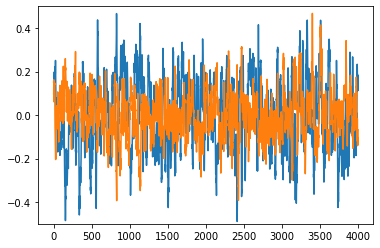

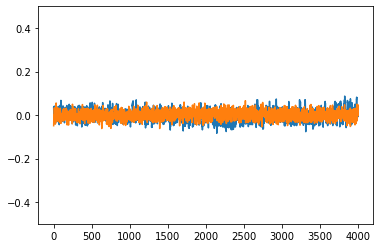

In [8]:
filenames = ["/work/data/trap_strength/Power02.62.txt","/work/data/trap_strength/Power72.2.txt"]

for _ in filenames:
    ret = extract_data(_)
    plt.plot(ret.x[:4000])
    plt.plot(ret.y[:4000])
    plt.ylim(-0.5,0.5)
    plt.show()

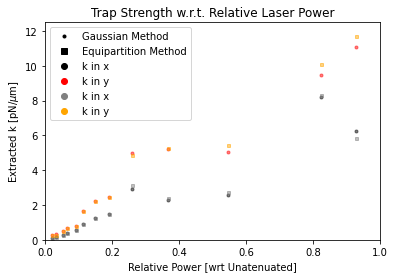

I am going to edit this plot with some graphics software to make the legend nice!


In [5]:
alpha = 0.5

plt.plot(powerArray,k_arr_strength_gauss[:,0],".",color = "black",alpha = alpha)
plt.plot(powerArray,k_arr_strength_gauss[:,1],".",color = "red",alpha = alpha)
plt.ylabel(r"Extracted k [pN/$\mu$m]")
plt.xlabel("Relative Power [wrt Unatenuated]")
#plt.title("Trap Strength w.r.t. Relative Laser Power\nGaussian Fit Method")
#plt.legend()
#plt.show()

plt.plot(powerArray,k_arr_strength_equi[:,0],"s",markersize = 3,color = "grey",alpha = alpha)
plt.plot(powerArray,k_arr_strength_equi[:,1],"s",markersize = 3,color = "orange",alpha = alpha)

plt.plot(-10,-10,"k.",label = "Gaussian Method")
plt.plot(-10,-10,"ks",label = "Equipartition Method")
plt.plot(-10,-10,"o",label = "k in x",color = "black")
plt.plot(-10,-10,"o",label = "k in y",color = "red")
plt.plot(-10,-10,"o",label = "k in x",color = "grey")
plt.plot(-10,-10,"o",label = "k in y",color = "orange")

plt.xlim(0,1)
plt.ylim(0,12.5)

plt.ylabel(r"Extracted k [pN/$\mu$m]")
plt.xlabel("Relative Power [wrt Unatenuated]")
plt.title("Trap Strength w.r.t. Relative Laser Power")
plt.legend()
plt.show()

print("I am going to edit this plot with some graphics software to make the legend nice!")

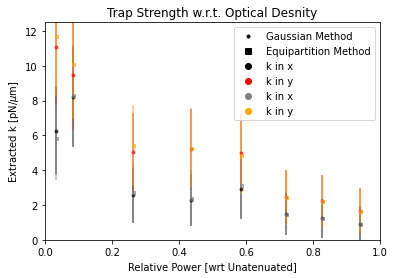

In [6]:
# Plot WRT Optical Desnity (OD)
OD_Array = -np.log10(powerArray)
OD_Array_error = OD_Array*( 1/(powerArray*np.log(10))*powerArray_err )
# x-axis error is of order 1e-3 is very small

yerr_array_gaussx = np.sqrt(k_arr_strength_gauss[:,0])
yerr_array_gaussy = np.sqrt(k_arr_strength_gauss[:,1])

yerr_array_equix = np.sqrt(k_arr_strength_equi[:,0])
yerr_array_equiy = np.sqrt(k_arr_strength_equi[:,1])

alphaVal = 0.6

plt.errorbar(OD_Array,k_arr_strength_gauss[:,0],yerr = yerr_array_gaussx, xerr = OD_Array_error, fmt =".",color = "black",alpha = alphaVal)
plt.errorbar(OD_Array,k_arr_strength_gauss[:,1],yerr = yerr_array_gaussy, xerr = OD_Array_error, fmt =".",color = "red",alpha = alphaVal)
plt.ylabel(r"Extracted k [pN/$\mu$m]")
plt.xlabel("OD")

plt.errorbar(OD_Array,k_arr_strength_equi[:,0],yerr = yerr_array_equix, xerr = OD_Array_error, fmt="s",markersize = 3,color = "grey",alpha = alphaVal)
plt.errorbar(OD_Array,k_arr_strength_equi[:,1],yerr = yerr_array_equiy, xerr = OD_Array_error, fmt="s",markersize = 3,color = "orange",alpha = alphaVal)

plt.plot(-10,-10,"k.",label = "Gaussian Method")
plt.plot(-10,-10,"ks",label = "Equipartition Method")
plt.plot(-10,-10,"o",label = "k in x",color = "black")
plt.plot(-10,-10,"o",label = "k in y",color = "red")
plt.plot(-10,-10,"o",label = "k in x",color = "grey")
plt.plot(-10,-10,"o",label = "k in y",color = "orange")

plt.xlim(0,1)
plt.ylim(0,12.5)

plt.ylabel(r"Extracted k [pN/$\mu$m]")
plt.xlabel("Relative Power [wrt Unatenuated]")
plt.title("Trap Strength w.r.t. Optical Desnity")
plt.legend()
plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4bb45f9e-f9d7-4771-843d-2a6451217511' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>